In [2]:
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

FONT_COLOR = "#22373a"
FILL_COLOR = "#b4cccf"

plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.25
plt.rcParams["grid.color"] = "#cccccc"

pd.options.display.max_columns = 999


In [8]:
conn = sqlite3.connect("_archive/7/TRUST1.db")
df1 = pd.read_sql_query("SELECT * FROM results", conn)
conn.close()

conn = sqlite3.connect("_archive/7/TRUST2.db")
df2 = pd.read_sql_query("SELECT * FROM results", conn)
conn.close()

df = pd.concat([df1, df2]).reset_index(drop=True)
df

,instance_id,solver_id,cost,time,comment,created_at
0,data/TSP/CEPS_benchmark/cluster_netgen/40.tsp,2152573642869061282,3.31,3.31,test1,2024-12-15 16:31:51
1,data/TSP/CEPS_benchmark/cluster_netgen/40.tsp,686356820175302440,6.37,6.37,test1,2024-12-15 16:31:51
2,data/TSP/CEPS_benchmark/cluster_netgen/40.tsp,508943627851605191,3.74,3.74,test1,2024-12-15 16:31:51
3,data/TSP/CEPS_benchmark/cluster_netgen/40.tsp,1191837438205487429,1.21,1.21,test1,2024-12-15 16:31:51
4,data/TSP/CEPS_benchmark/grid/04.tsp,2152573642869061282,0.78,0.78,test1,2024-12-15 16:31:51
...,...,...,...,...,...,...
19995,data/TSP/CEPS_benchmark/cluster/47.tsp,1988960974175372683,4.17,4.17,test5,2024-12-15 20:26:55
19996,data/TSP/CEPS_benchmark/expansion/22.tsp,2152573642869061282,0.68,0.68,test5,2024-12-15 20:26:55
19997,data/TSP/CEPS_benchmark/expansion/22.tsp,81758014504876873,0.74,0.74,test5,2024-12-15 20:26:55
19998,data/TSP/CEPS_benchmark/expansion/22.tsp,1347094451537985230,100.00,10.00,test5,2024-12-15 20:27:08


In [14]:
df = df.loc[df["solver_id"] != "1347094451537985230"]    

In [15]:
_ = df.loc[df["comment"].str.contains("test")].pivot_table(index=["instance_id", "solver_id"], columns="comment", values="time").sort_values(["instance_id", "solver_id"])
_["range"] = _.max(axis=1) - _.min(axis=1)
_ = _.sort_values(by="range")
_ = _.reset_index()
_

comment,instance_id,solver_id,test1,test2,test3,test4,test5,range
0,data/TSP/CEPS_benchmark/cluster/00.tsp,1191837438205487429,10.00,10.00,10.00,10.00,10.00,0.00
1,data/TSP/CEPS_benchmark/compression/13.tsp,686356820175302440,10.00,10.00,10.00,10.00,10.00,0.00
2,data/TSP/CEPS_benchmark/implosion/13.tsp,508943627851605191,10.00,10.00,10.00,10.00,10.00,0.00
3,data/TSP/CEPS_benchmark/implosion/10.tsp,1191837438205487429,10.00,10.00,10.00,10.00,10.00,0.00
4,data/TSP/CEPS_benchmark/compression/15.tsp,2152573642869061282,10.00,10.00,10.00,10.00,10.00,0.00
...,...,...,...,...,...,...,...,...
2995,data/TSP/CEPS_benchmark/expansion/26.tsp,1988960974175372683,7.85,9.16,7.81,8.29,7.82,1.35
2996,data/TSP/CEPS_benchmark/explosion/31.tsp,686356820175302440,5.56,5.52,5.53,5.54,6.87,1.35
2997,data/TSP/CEPS_benchmark/compression/12.tsp,508943627851605191,10.00,9.09,9.19,9.26,8.61,1.39
2998,data/TSP/CEPS_benchmark/implosion/23.tsp,508943627851605191,8.61,8.43,8.83,8.54,10.00,1.57


In [16]:
_.groupby("solver_id")["range"].mean()

solver_id
1191837438205487429    0.23262
1988960974175372683    0.19162
2152573642869061282    0.18039
508943627851605191     0.26638
686356820175302440     0.26680
81758014504876873      0.17636
Name: range, dtype: float64

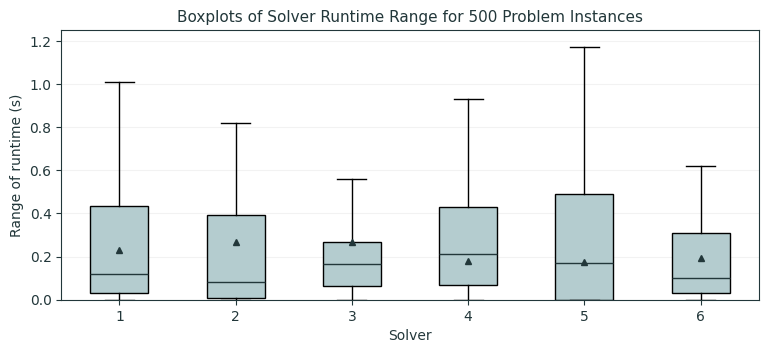

In [18]:
solvers = _["solver_id"].unique()
n = len(solvers)

fig, ax = plt.subplots(figsize=(9, 3.5))

x = _.pivot_table(index="instance_id", columns="solver_id", values="range")
ax.boxplot(x, patch_artist=True, boxprops=dict(facecolor=FILL_COLOR), showfliers=False, medianprops=dict(color=FONT_COLOR))
for i, solver in enumerate(solvers):
    mean_value = x[solver].mean()
    ax.plot([i + 1], [mean_value], marker='^', markersize=5, color=FONT_COLOR)

ax.set_ylabel("Range of runtime (s)", color=FONT_COLOR)
ax.set_xlabel("Solver", color=FONT_COLOR)
ax.set_title("Boxplots of Solver Runtime Range for 500 Problem Instances", fontsize=11, color=FONT_COLOR)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.spines[["left", "top", "right", "bottom"]].set_color(FONT_COLOR)
ax.tick_params(axis='x', colors=FONT_COLOR)
ax.tick_params(axis='y', colors=FONT_COLOR)
ax.set_ylim(0, 1.25)

plt.savefig("solver_trust.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()